<a href="https://colab.research.google.com/github/Chaitra-B-V/ClusteringUsingPycaret/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [6]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Chaitra-B-V/ClusteringUsingPycaret/main/Predict_student_%20knowledge_level.csv'

In [9]:
 dataset = pd.read_csv(url)

In [10]:
dataset.shape

(403, 6)

In [11]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (383, 6)
Unseen Data For Predictions: (20, 6)


In [21]:
from pycaret.clustering import *

exp_clu101 = setup(data, normalize = True, 
                   session_id = 123,use_gpu=True)

,Description,Value
0,session_id,123
1,Original Data,"(383, 6)"
2,Missing Values,False
3,Numeric Features,5
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(383, 10)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='UNSUPERVIS

In [31]:
kmeans = create_model('kmeans', num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1882,79.5968,1.8199,0,0,0


INFO:logs:create_model_container: 5
INFO:logs:master_model_container: 5
INFO:logs:display_container: 6
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [32]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [33]:
kmodes = create_model('kmodes', num_clusters = 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1095,38.735,2.2767,0,0,0


INFO:logs:create_model_container: 6
INFO:logs:master_model_container: 6
INFO:logs:display_container: 7
INFO:logs:KModes(cat_dissim=<function matching_dissim at 0x7f339add2cb0>, init='Cao',
       max_iter=100, n_clusters=6, n_init=1, n_jobs=-1, random_state=123,
       verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [34]:
print(kmodes)

KModes(cat_dissim=<function matching_dissim at 0x7f339add2cb0>, init='Cao',
       max_iter=100, n_clusters=6, n_init=1, n_jobs=-1, random_state=123,
       verbose=0)


In [35]:
models()

INFO:logs:gpu_param set to True


,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [36]:
kmean_results = assign_model(kmeans)
kmean_results.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(383, 7)
INFO:logs:assign_model() succesfully completed......................................


,STG,SCG,STR,LPR,PEG,UNS,Cluster
0,0.750,0.015,0.78,0.31,0.53,Middle,Cluster 0
1,0.120,0.120,0.75,0.35,0.80,High,Cluster 0
2,0.345,0.299,0.10,0.64,0.13,Low,Cluster 1
3,0.365,0.680,0.10,0.63,0.18,Low,Cluster 1
4,0.320,0.270,0.52,0.81,0.30,Middle,Cluster 1


In [37]:
plot_model(kmeans)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


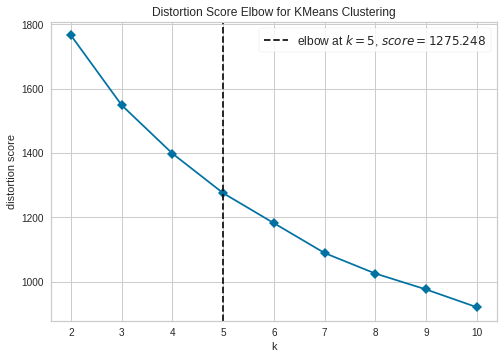

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [38]:
plot_model(kmeans, plot = 'elbow')

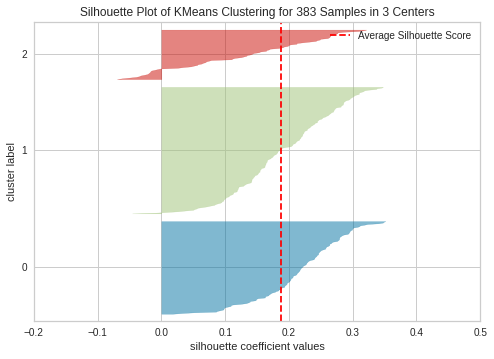

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [39]:
plot_model(kmeans, plot = 'silhouette')

In [40]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [44]:
plot_model(kmeans, plot = 'distribution', feature = 'STR')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [45]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), ml_usecase=MLUsecase.CLUSTERING)


,STG,SCG,STR,LPR,PEG,UNS,Cluster
0,0.090,0.15,0.40,0.10,0.66,Middle,Cluster 0
1,0.120,0.28,0.20,0.78,0.20,Low,Cluster 1
2,0.090,0.55,0.12,0.78,0.05,Low,Cluster 1
3,0.270,0.31,0.32,0.41,0.28,Low,Cluster 1
4,0.245,0.26,0.38,0.49,0.27,Low,Cluster 1


In [47]:
save_model(kmeans,'Final KMeans Model 08Sept2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), model_name=Final KMeans Model 08Sept2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
      

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  KMe

In [48]:
saved_kmeans = load_model('Final KMeans Model 08Sept2022')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final KMeans Model 08Sept2022, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [49]:
new_prediction = predict_model(saved_kmeans, data=data_unseen)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('fix_perfect', 'passthrough'),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),

,STG,SCG,STR,LPR,PEG,UNS,Cluster
0,0.090,0.15,0.40,0.10,0.66,Middle,Cluster 0
1,0.120,0.28,0.20,0.78,0.20,Low,Cluster 1
2,0.090,0.55,0.12,0.78,0.05,Low,Cluster 1
3,0.270,0.31,0.32,0.41,0.28,Low,Cluster 1
4,0.245,0.26,0.38,0.49,0.27,Low,Cluster 1
